### Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Carga de datos

In [2]:
def carga_de_datos(nombre):
    data = pd.read_csv('./Data/'+nombre+'.csv')
    data['clase'] = nombre
    return data
data_list= ['bajar_monte','subir_monte','bici','coche']
# un df por cada csv
df_list = [carga_de_datos(data) for data in data_list]
df_bajar_monte = df_list[0]
df_subir_monte = df_list[1]
df_bici = df_list[2]
df_coche = df_list[3]

#### Visualizacion en el dominio temporal

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def setup_graph(ax, title, x_label="Frecuencia (Hz)", y_label="Amplitud [$m/s^2$]", grid=True):
    ax.grid(grid)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# DOMINIO TEMPORAL

---- Aceleración Lineal ----


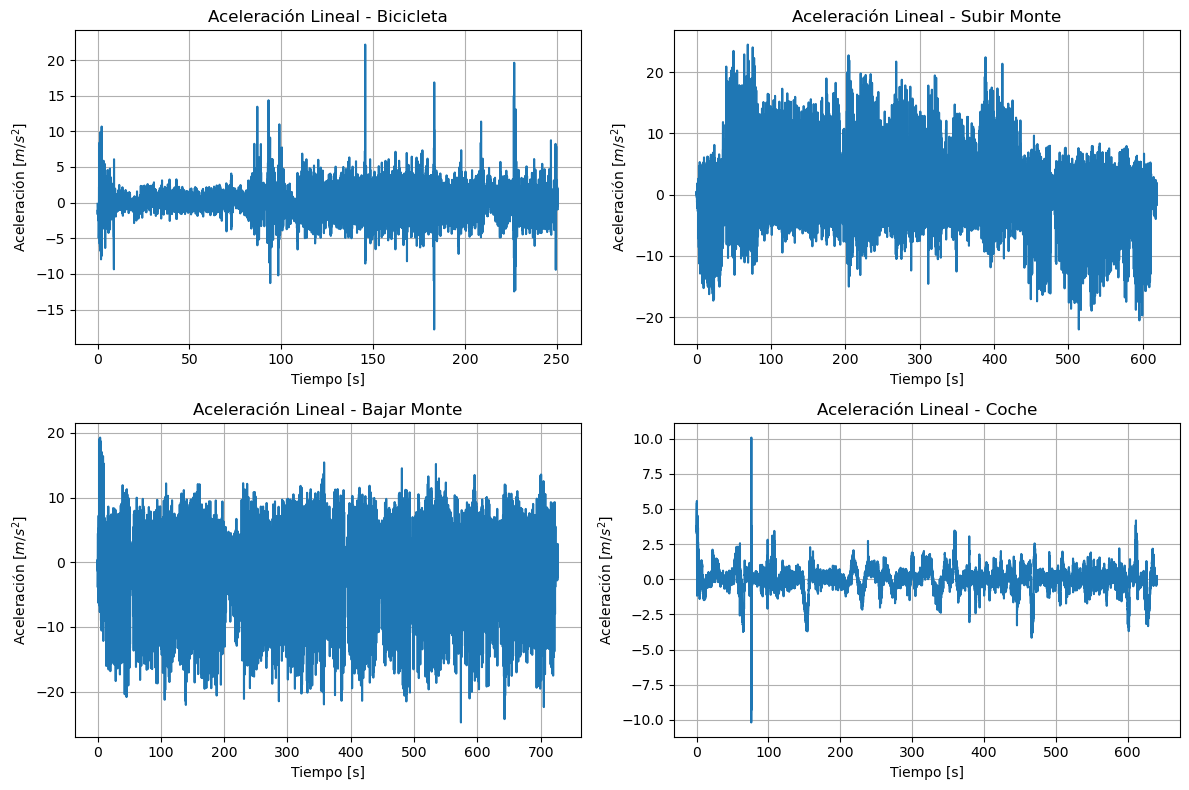

In [4]:
# Plot de la aceleración lineal
print('---- Aceleración Lineal ----')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, (data, title) in enumerate([(df_bici, 'Bicicleta'), (df_subir_monte, 'Subir Monte'), (df_bajar_monte, 'Bajar Monte'), (df_coche, 'Coche')]):
    ax = axs[i // 2, i % 2]
    ax.plot(data['Time (s)'], data['Linear Acceleration x (m/s^2)'])
    setup_graph(ax, 'Aceleración Lineal - ' + title, 'Tiempo [s]', 'Aceleración [$m/s^2$]')
plt.tight_layout()
plt.show()

Velocidad

---- Velocidad ----


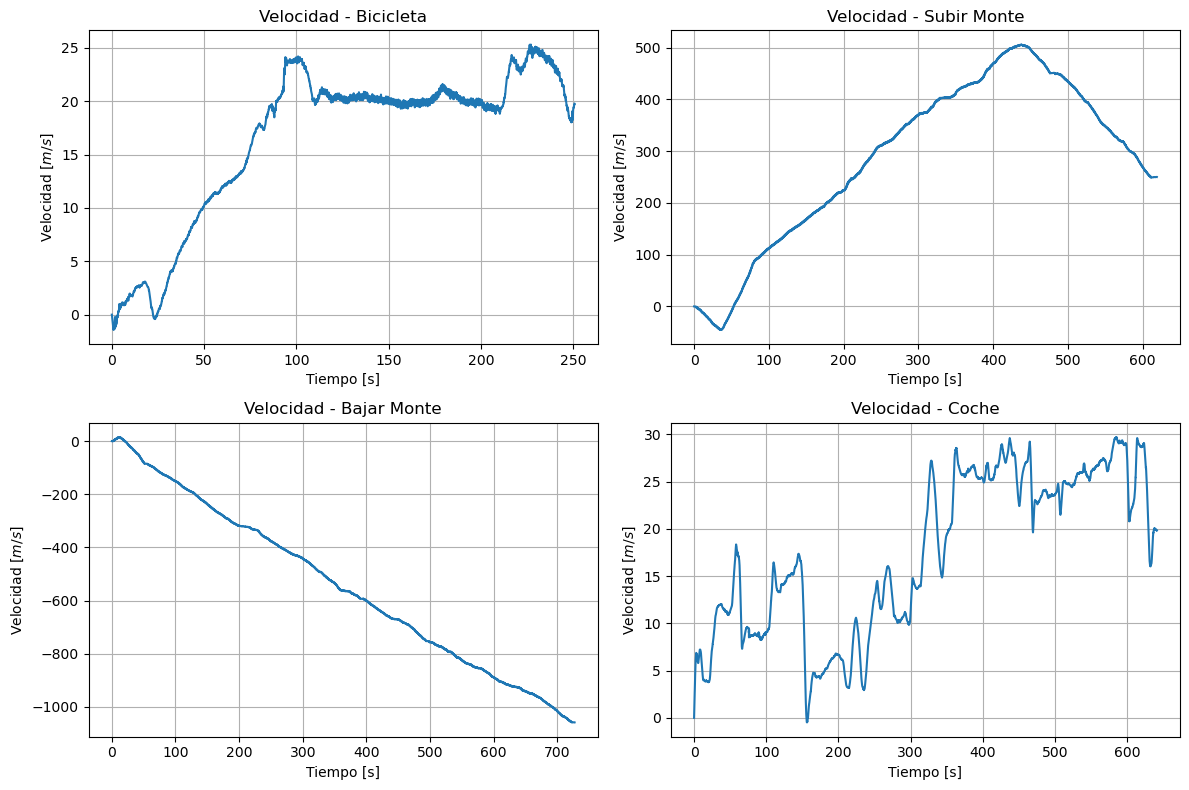

In [5]:
import numpy as np
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

print('---- Velocidad ----')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, (data, title) in enumerate([(df_bici, 'Bicicleta'), (df_subir_monte, 'Subir Monte'), (df_bajar_monte, 'Bajar Monte'), (df_coche, 'Coche')]):
    ax = axs[i // 2, i % 2]
    
    # Calcula la velocidad integrando la aceleración
    velocity = cumtrapz(data['Linear Acceleration x (m/s^2)'], x=data['Time (s)'], initial=0)
    
    ax.plot(data['Time (s)'], velocity)
    setup_graph(ax, 'Velocidad - ' + title, 'Tiempo [s]', 'Velocidad [$m/s$]')

plt.tight_layout()
plt.show()

Caracteristicas

In [6]:
import numpy as np
import pandas as pd

def calcular_medidas(dataset_list):
    for idx, df_ejemplo in enumerate(dataset_list):
        print(f"Dataset {idx + 1}:")
        for col in df_ejemplo.columns:
            if 'Linear Acceleration' in col:
                rfft_output = np.fft.rfft(df_ejemplo[col])
                rfft_mag = np.abs(rfft_output) / len(rfft_output)
                rfreqs = np.fft.rfftfreq(len(df_ejemplo), d=1/df_ejemplo['Time (s)'].diff().mean())
                
                print('Frecuencia dominante: ', rfreqs[np.argmax(rfft_mag)])
                print('PSD: ', np.sum(rfft_mag))
                print('Skewness:', df_ejemplo[col].skew())
                print('Kurtosis:', df_ejemplo[col].kurtosis())
                print("----------------------------------")

# Ejemplo de uso:
# Suponiendo que tienes una lista llamada datasets que contiene tus DataFrames
# calcular_medidas(datasets)


In [7]:
calcular_medidas(df_list)

Dataset 1:
Frecuencia dominante:  0.0
PSD:  392.0570321664526
Skewness: -0.4287577285351693
Kurtosis: -0.22337597226156491
----------------------------------
Frecuencia dominante:  0.0
PSD:  270.90466123954894
Skewness: -0.4302852991939478
Kurtosis: -1.0017776547943507
----------------------------------
Frecuencia dominante:  0.0
PSD:  288.9203094465918
Skewness: -0.12608283866302197
Kurtosis: 1.3877943785563982
----------------------------------
Dataset 2:
Frecuencia dominante:  2.6060166393442984e-05
PSD:  348.28360123571065
Skewness: 0.4053252625657361
Kurtosis: 0.858089784222281
----------------------------------
Frecuencia dominante:  0.0
PSD:  237.1657219933243
Skewness: -0.44283853205385504
Kurtosis: -0.6356130148864159
----------------------------------
Frecuencia dominante:  0.0
PSD:  287.6886930711793
Skewness: -0.15841083905991477
Kurtosis: 0.777553433242816
----------------------------------
Dataset 3:
Frecuencia dominante:  0.00010311606102881391
PSD:  169.93820201841066
S

# DOMINIO FRECUENCIAL

In [8]:
df_ejemplo= df_bajar_monte

In [9]:
T=df_ejemplo['Time (s)'].diff().mean()
fs=1/T
print('Fs= ',fs)

Fs=  200.59995026453598


---- Dominio Frecuencial ----


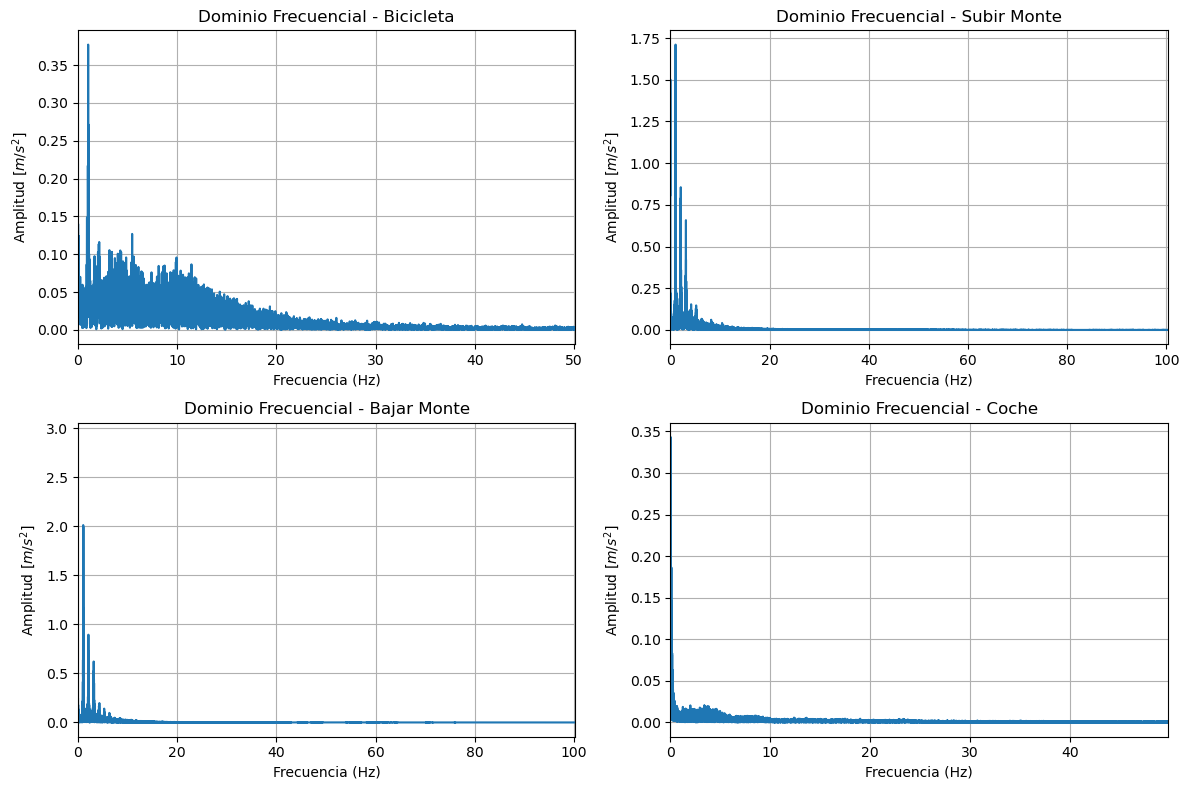

In [10]:
# Plot en el dominio frecuencial
print('---- Dominio Frecuencial ----')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, (data, title) in enumerate([(df_bici, 'Bicicleta'), (df_subir_monte, 'Subir Monte'), (df_bajar_monte, 'Bajar Monte'), (df_coche, 'Coche')]):
    ax = axs[i // 2, i % 2]
    rfft_output = np.fft.rfft(data['Linear Acceleration x (m/s^2)'])
    rfft_mag = np.abs(rfft_output) / len(rfft_output)
    T = data['Time (s)'].diff().mean()
    fs = 1 / T
    rfreqs = np.fft.rfftfreq(len(data), d=T)
    ax.plot(rfreqs, rfft_mag)
    setup_graph(ax, 'Dominio Frecuencial - ' + title)
    ax.set_ylabel('Amplitud [$m/s^2$]')
    ax.set_xlim(0, fs/2)  # Limitar el eje x hasta la mitad de la frecuencia de muestreo
plt.tight_layout()
plt.show()
#

---- Ventana de Hanning ----


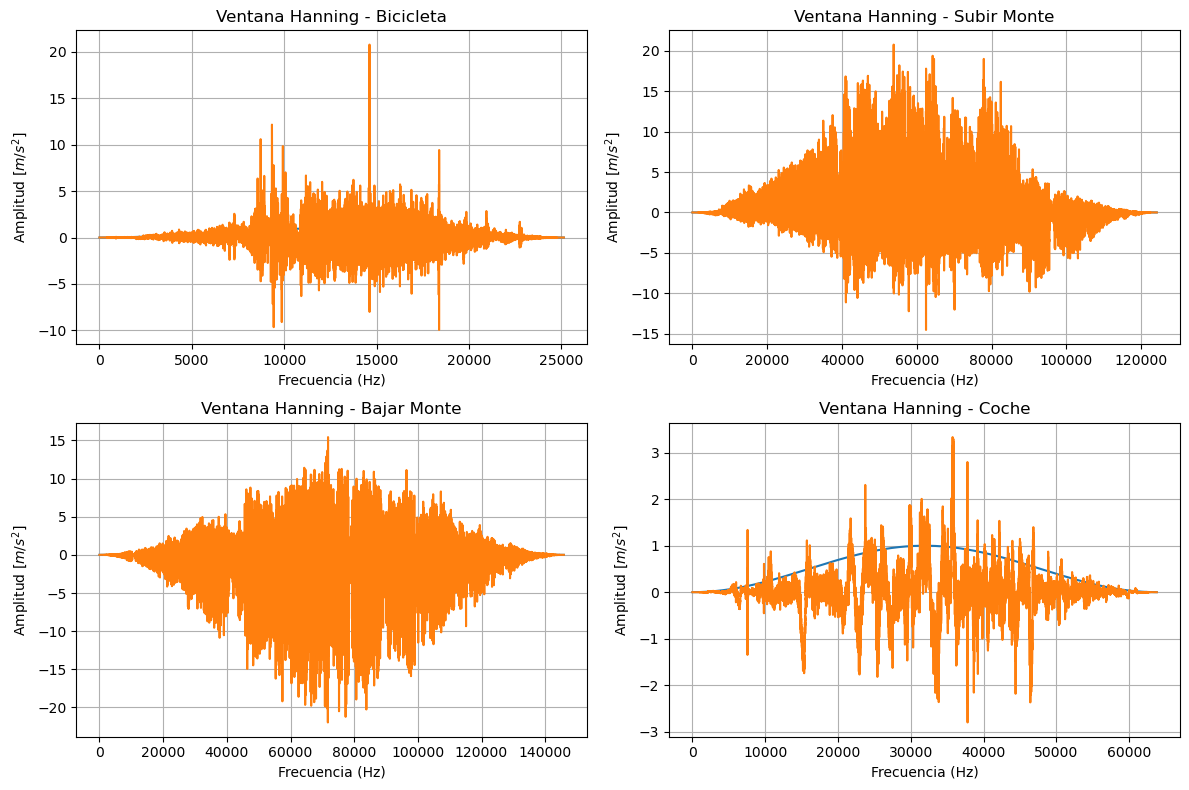

In [11]:
# Plot de la ventana de  Hanning
from scipy.signal import get_window
print('---- Ventana de Hanning ----')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, (data, title) in enumerate([(df_bici, 'Bicicleta'), (df_subir_monte, 'Subir Monte'), (df_bajar_monte, 'Bajar Monte'), (df_coche, 'Coche')]):
    ax = axs[i // 2, i % 2]
    window = get_window("hann", len(data), fftbins=True)
    ax.plot(window)
    ax.set_ylabel('Samples')
    ax.set_xlabel('Frecuencia [Hz]')
    setup_graph(ax, 'Ventana Hanning - ' + title)
    
    # Plot de la aceleración lineal con ventana de Hanning
    ax.plot(data['Linear Acceleration x (m/s^2)'] * window)
plt.tight_layout()
plt.show()


In [12]:
T=df_bici['Time (s)'].diff().mean()
fs=1/T
print('Fs= ',fs)

Fs=  100.30355164194997


In [13]:
print('Frecuencia dominante: ',rfreqs[np.argmax(rfft_mag)])
print('PSD: ',np.sum(rfft_mag))
print('Skewness:',df_ejemplo['Linear Acceleration x (m/s^2)'].skew())
print('Kurtosis:',df_ejemplo['Linear Acceleration x (m/s^2)'].kurtosis())

Frecuencia dominante:  0.03744467678900212
PSD:  64.94961717321661
Skewness: -0.4287577285351693
Kurtosis: -0.22337597226156491


In [14]:
print('Frecuencia dominante: ',rfreqs[np.argmax(rfft_mag)])
print('PSD: ',np.sum(rfft_mag))

Frecuencia dominante:  0.03744467678900212
PSD:  64.94961717321661


In [15]:
def Myfft(Fs, X):
    from scipy.signal import get_window
    window = get_window("hann", len(X), fftbins=True)
    X=X*window
    ##
    fft_out = np.fft.rfft(X)
    fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
    num_samples = len(X)
    rfreqs = [(i*1.0/num_samples)*Fs for i in range(num_samples//2+1)]
    return fft_mag, rfreqs

In [16]:
import pandas as pd

# Funcion para obtener características de frecuencia
def freq_features(raw_df, nombre, window_size=1000, step_size=500):
    data = []
    for i in range(0, len(raw_df) - window_size + 1, step_size):
        window_data_X = raw_df.iloc[i:i+window_size, 1]  # X_axis
        window_data_Y = raw_df.iloc[i:i+window_size, 2]  # Y_axis
        window_data_Z = raw_df.iloc[i:i+window_size, 3]  # Z_axis

        fft_mag_X, fft_freq = Myfft(fs, window_data_X)
        fft_mag_Y, _ = Myfft(fs, window_data_Y)
        fft_mag_Z, _ = Myfft(fs, window_data_Z)
        data.append([fft_freq[np.argmax(fft_mag_X)], np.sum(fft_mag_X),
                     fft_freq[np.argmax(fft_mag_Y)], np.sum(fft_mag_Y),
                     fft_freq[np.argmax(fft_mag_Z)], np.sum(fft_mag_Z), nombre])

    freq_features = pd.DataFrame(data, columns=['DF X', 'PSD X', 'DF Y', 'PSD Y', 'DF Z', 'PSD Z', 'clase'])
    return freq_features

# Ejemplo de uso


In [17]:
subir_monte = freq_features(df_subir_monte, 'subir_monte')
bajar_monte = freq_features(df_bajar_monte, 'bajar_monte')
bici = freq_features(df_bici, 'bici')
coche = freq_features(df_coche, 'coche')

In [18]:
df_frecuencial=pd.concat([subir_monte, bajar_monte,bici,coche])
df_frecuencial.head()
df_frecuencial['clase'].value_counts()

clase
bajar_monte    290
subir_monte    247
coche          126
bici            49
Name: count, dtype: int64

In [57]:
 # Usa AdaBoost para clasificar
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Codifica las etiquetas
le = LabelEncoder()
df_frecuencial['clase'] = le.fit_transform(df_frecuencial['clase'])

# Separa las características de la etiqueta
X = df_frecuencial.drop('clase', axis=1)
y = df_frecuencial['clase']

# Separa los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# Entrena el modelo
dt = RandomForestClassifier(n_estimators=300, random_state=44)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=500, random_state=44)
ada.fit(X_train, y_train)

# Predice los datos de prueba
y_pred = ada.predict(X_test)

# Calcula la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.2%}')



c:\Users\Unai\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión: 86.45%


In [49]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[66,  0,  0, 31],
       [ 3, 16,  1,  1],
       [ 0,  0, 33,  0],
       [12,  1,  0, 50]], dtype=int64)

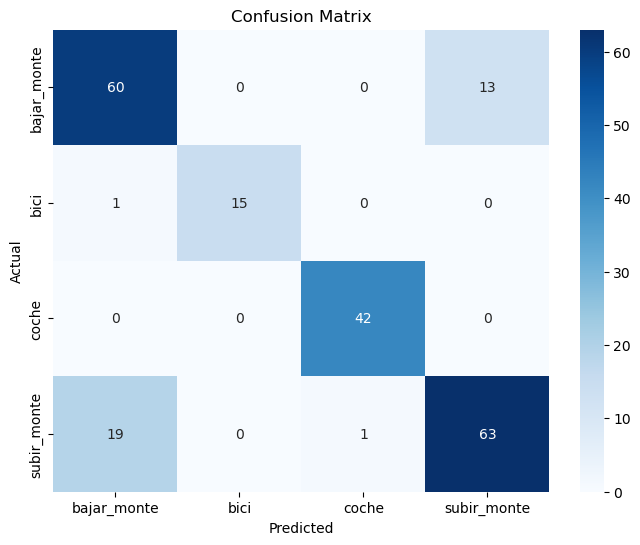

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=labelencoder_y.classes_, yticklabels=labelencoder_y.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# haz feature importance
importances = ada.feature_importances_
indices = np.argsort(importances)[::-1]
